In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

/home/keanu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Helper Libraries 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

1.8.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = \
fashion_mnist.load_data()

In [6]:
class_names = ['Tshirt/top','Trouser','Pullover','Dress','Coat',\
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

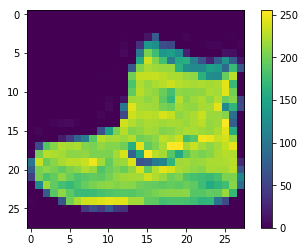

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

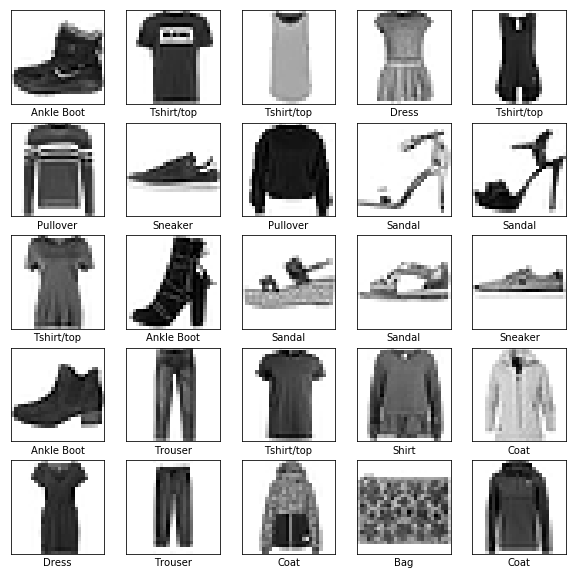

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.5001 - acc: 0.8254
Epoch 2/5
60000/60000 [==============================] - 7s 108us/step - loss: 0.3786 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3398 - acc: 0.8751
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.3146 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2958 - acc: 0.8901


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ',test_acc)

10000/10000 [==============================] - 0s 29us/step
Test accuracy:  0.8797


In [19]:
predictions = model.predict(test_images)
predictions[0]

array([1.5968233e-05, 2.0237992e-07, 1.7429011e-07, 2.0020295e-08,
       3.2578346e-06, 5.7519833e-03, 1.1320521e-06, 2.0276759e-02,
       6.4831649e-05, 9.7388566e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = \
    predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],\
                                        100*np.max(predictions_array),\
                                        class_names[true_label]),\
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

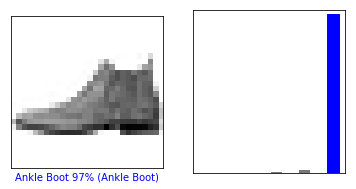

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

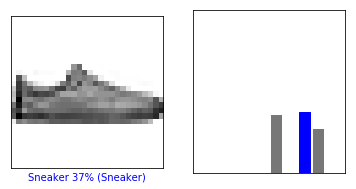

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

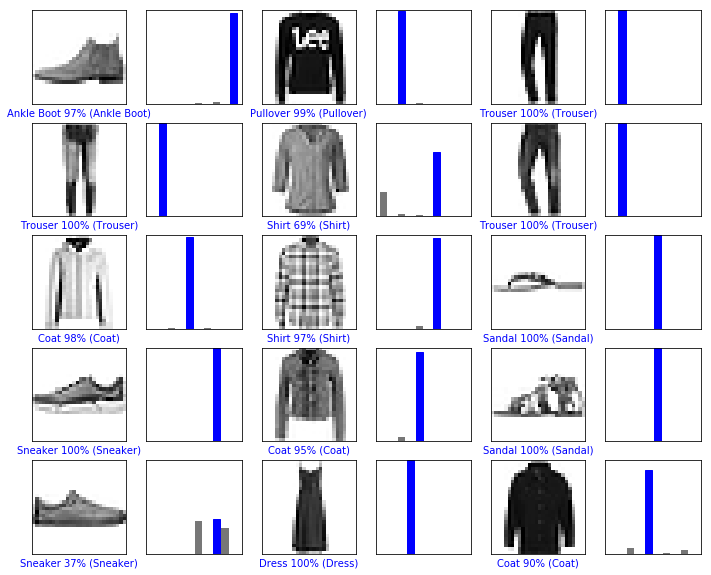

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [30]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5968248e-05 2.0237992e-07 1.7428978e-07 2.0020334e-08 3.2578407e-06
  5.7519809e-03 1.1320510e-06 2.0276763e-02 6.4831715e-05 9.7388566e-01]]


In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

9